Lambda School Data Science

*Unit 1, Sprint 1, Module 3*

---



# Join and Reshape Data 

- Student can concatenate data with pandas
- Student can merge data with pandas
- Student can understand and describe tidy data formatting
- Student can use the `.melt()` and `.pivot()` functions to translate between wide and tidy data format.

Helpful Links:
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
- [Tidy Data](https://en.wikipedia.org/wiki/Tidy_data)
  - Combine Data Sets: Standard Joins
  - Tidy Data
  - Reshaping Data
- Python Data Science Handbook
  - [Chapter 3.6](https://jakevdp.github.io/PythonDataScienceHandbook/03.06-concat-and-append.html), Combining Datasets: Concat and Append
  - [Chapter 3.7](https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html), Combining Datasets: Merge and Join
  - [Chapter 3.8](https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html), Aggregation and Grouping
  - [Chapter 3.9](https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html), Pivot Tables

# [Objective](#concat) Concatenate dataframes with pandas



## Overview

"Concatenate" is a fancy word for joining two things together. For example, we can concatenate two strings together using the `+` operator.

In [4]:
'We can join/concatenate two strings together ' + 'using the "+" operator.'

'We can join/concatenate two strings together using the "+" operator.'

When we "concatenate" two dataframes we will "stick them together" either by rows or columns. Lets look at some simple examples:

In [0]:
import pandas as pd

In [0]:
df1 = pd.DataFrame({'a': [1,2,3,4], 'b': [4,5,6,7], 'c': [7,8,9,10]})

df2 = pd.DataFrame({'a': [6,4,8,7], 'b': [9,4,3,2], 'c': [1,6,2,9]})

In [7]:
df1.head()

,a,b,c
0,1,4,7
1,2,5,8
2,3,6,9
3,4,7,10


In [8]:
df2.head()

,a,b,c
0,6,9,1
1,4,4,6
2,8,3,2
3,7,2,9


### Concatenate by Rows 

concatenating by rows is the default behavior of `pd.concat()` This is often the most common form of concatenation. 

In [9]:
by_rows = pd.concat([df1, df2])

by_rows

,a,b,c
0,1,4,7
1,2,5,8
2,3,6,9
3,4,7,10
0,6,9,1
1,4,4,6
2,8,3,2
3,7,2,9


### Concatenate by Columns

In [10]:
by_cols = pd.concat([df1, df2], axis=1)

by_cols

,a,b,c,a,b,c
0,1,4,7,6,9,1
1,2,5,8,4,4,6
2,3,6,9,8,3,2
3,4,7,10,7,2,9


When concatenating dataframes, it is done using the column headers and row index values to match rows up. If these don't match up, then `NaN` values will be added where matches can't be found. 

In [0]:
df3 = pd.DataFrame({'a': [4,3,2,1], 'b': [4,5,6,7], 'c': [7,8,9,10]})

df4 = pd.DataFrame({'a': [6,4,8,7,8], 'b': [9,4,3,2,1], 'd': [1,6,2,9,5]})

In [12]:
df3.head()

,a,b,c
0,4,4,7
1,3,5,8
2,2,6,9
3,1,7,10


In [13]:
df4.head()

,a,b,d
0,6,9,1
1,4,4,6
2,8,3,2
3,7,2,9
4,8,1,5


### Concatenate by rows when not all column headers match

In [14]:
by_rows = pd.concat([df3, df4])

by_rows

,a,b,c,d
0,4,4,7.0,NaN
1,3,5,8.0,NaN
2,2,6,9.0,NaN
3,1,7,10.0,NaN
0,6,9,NaN,1.0
1,4,4,NaN,6.0
2,8,3,NaN,2.0
3,7,2,NaN,9.0
4,8,1,NaN,5.0


### Concatenate by columns when not all row indexes match

In [15]:
by_columns = pd.concat([df3, df4], axis=1)
by_columns

,a,b,c,a,b,d
0,4.0,4.0,7.0,6,9,1
1,3.0,5.0,8.0,4,4,6
2,2.0,6.0,9.0,8,3,2
3,1.0,7.0,10.0,7,2,9
4,NaN,NaN,NaN,8,1,5


In [17]:
by_columns['a']

,a,a
0,4.0,6
1,3.0,4
2,2.0,8
3,1.0,7
4,NaN,8


Whenever we are combining dataframes, if appropriate values cannot be found based on the rules of the method we are using, then missing values will be filled with `NaNs`.

## Follow Along



We’ll work with a dataset of [3 Million Instacart Orders, Open Sourced](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2)!

The files that we will be working with are in a folder of CSVs, we need to load that folder of CSVs, explore the CSVs to make sure that we understand what we're working with, and where the important data lies, and then work to combine the dataframes together as necessary. 



Our goal is to reproduce this table which holds the first two orders for user id 1.


In [1]:
from IPython.display import display, Image
url = 'https://cdn-images-1.medium.com/max/1600/1*vYGFQCafJtGBBX5mbl0xyw.png'
example = Image(url=url, width=600)

display(example)

In [2]:
#pulling dataset
!wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

--2020-04-09 05:48:33--  https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.16.78
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.16.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205548478 (196M) [application/x-gzip]
Saving to: ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’

instacart_online_gr 100%[===================>] 196.03M  47.7MB/s    in 4.5s    

2020-04-09 05:48:38 (43.3 MB/s) - ‘instacart_online_grocery_shopping_2017_05_01.tar.gz’ saved [205548478/205548478]



In [3]:
#unzipping the tar ball
!tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

instacart_2017_05_01/
instacart_2017_05_01/._aisles.csv
instacart_2017_05_01/aisles.csv
instacart_2017_05_01/._departments.csv
instacart_2017_05_01/departments.csv
instacart_2017_05_01/._order_products__prior.csv
instacart_2017_05_01/order_products__prior.csv
instacart_2017_05_01/._order_products__train.csv
instacart_2017_05_01/order_products__train.csv
instacart_2017_05_01/._orders.csv
instacart_2017_05_01/orders.csv
instacart_2017_05_01/._products.csv
instacart_2017_05_01/products.csv


In [4]:



#'magic command' change directory
# working from within this folder
%cd instacart_2017_05_01

/content/instacart_2017_05_01


In [5]:
#passing 'flags' into the command to filter how and what data is shown
!ls -lh *.csv

-rw-r--r-- 1 502 staff 2.6K May  2  2017 aisles.csv
-rw-r--r-- 1 502 staff  270 May  2  2017 departments.csv
-rw-r--r-- 1 502 staff 551M May  2  2017 order_products__prior.csv
-rw-r--r-- 1 502 staff  24M May  2  2017 order_products__train.csv
-rw-r--r-- 1 502 staff 104M May  2  2017 orders.csv
-rw-r--r-- 1 502 staff 2.1M May  2  2017 products.csv


### aisles

We don't need anything from aisles.csv

In [6]:
aisles = pd.read_csv('aisles.csv')
print(aisles.shape)
aisles.head()

NameError: ignored

### departments

We don't need anything from departments.csv

In [7]:
departments = pd.read_csv('departments.csv')
print(departments.shape)
departments.head()

NameError: ignored

### order_products__prior

We need:
- order id
- proudct id
- add to cart order

Everything except for 'reordered'

In [10]:
order_products__prior = pd.read_csv('order_products__prior.csv')
print(order_products__prior.shape)
order_products__prior.head()

(32434489, 4)


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


### order_products__train

We need:
- order id
- proudct id
- add to cart order

Everything except for 'reordered'

Do you see anything similar between order_products__train and order_products__prior?



In [11]:
order_products__train = pd.read_csv('order_products__train.csv')
print(order_products__train.shape)
order_products__train.head()

(1384617, 4)


,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


### orders

We need:
- order id
- user id
- order number
- order dow
- order hour of day

In [12]:
orders = pd.read_csv('orders.csv')
print(orders.shape)
orders.head()

(3421083, 7)


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


### products

We need:
- product id
- product name

In [13]:
products = pd.read_csv('products.csv')
print(products.shape)
products.head()

(49688, 4)


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [14]:
display(example)

## Concatenate order_products__prior and order_products__train




In [15]:
# order_products__prior = order_products__prior.drop('reordered', axis=1)

# order_products__prior = order_products__prior[['order_id', 'product_id', 'add_to_cart_order']]

order_products = pd.concat([order_products__prior[['order_id', 'product_id', 'add_to_cart_order']], 
                            order_products__train[['order_id', 'product_id', 'add_to_cart_order']]])

print(order_products.shape)
order_products.head()

(33819106, 3)


,order_id,product_id,add_to_cart_order
0,2,33120,1
1,2,28985,2
2,2,9327,3
3,2,45918,4
4,2,30035,5


In [16]:
order_products__prior.shape

(32434489, 4)

In [17]:
order_products__train.shape

(1384617, 4)

In [0]:
#dir(order_products)

## Challenge

Concatenating dataframes means to stick two dataframes together either by rows or by columns. The default behavior of `pd.concat()` is to take the rows of one dataframe and add them to the rows of another dataframe. If we pass the argument `axis=1` then we will be adding the columns of one dataframe to the columns of another dataframe.

Concatenating dataframes is most useful when the columns are the same between two dataframes or when we have matching row indices between two dataframes. 

Be ready to use this method to combine dataframes together during your assignment.

# [Objective](#merge) Merge dataframes with pandas



## Overview

In [20]:
display(example)

Before we can continue we need to understand where the data in the above table is coming from and what why specific pieces of data are held in the specific dataframes.

Each of these CSVs has a specific unit of observation (row). The columns that we see included in each CSV were selected purposefully. For example, everything each row of the `orders` dataframe is a specific and unique order -telling us who made the order, and when they made it. Every row in the `products` dataframe tells us about a specific and unique product that thestore offers. And everything in the `order_products` dataframe tells us about how products are associated with specific orders -including when the product was added to the shopping cart. 

### The Orders Dataframe

Holds information about specific orders, things like who placed the order, what 

- user_id
- order_id
- order_number
- order_dow
- order_hour_of_day

### The Products Dataframe

Holds information about individual products.

- product_id
- product_name

### The Order_Products Dataframe

Tells us how products are associated with specific orders since an order is a group of products.

- order_id
- product_id
- add_to_cart_order

As we look at the table that we're trying to recreate, we notice that we're not looking at specific orders or products, but at a specific **USER**. We're looking at the first two orders for a specific user and the products associated with those orders, so we'll need to combine dataframes to get all of this data together into a single table.

**The key to combining all of this information is that we need values that exist in both datasets that we can use to match up rows and combine dataframes.**

## Follow Along

We have two dataframes, so we're going to need to merge our data twice. As we approach merging datasets together we will take the following approach.

1) Identify which to dataframes we would like to combine.

2) Find columns that are common between both dataframes that we can use to match up information.

3) Slim down both of our dataframes so that they only relevant data before we merge.

4) Merge the dataframes.

In [19]:
display(example)

### First Merge

1) Combine `orders` and `order_products`

2) We will use the `order_id` column to match information between the two datasets

3) Lets slim down our dataframes to only the information that we need. We do this because the merge process is complex. Why would we merge millions of rows together if we know that we're only going to need 11 rows when we're done

What specific conditions could we use to slim down the `orders` dataframe?

`user_id == 1` and `order_id <=2`

or

`order_id == 2539329` or `order_id == 2398795`

In [0]:
loan_status = "Not Current"

if loan_status == "Current" or loan_status == "Fully Paid":
  print("It's Current!")

In [21]:
loan_status == "Current"

False

In [23]:
# An example of dataframe filtering

# Create a condition
orders['order_id'] <= 5


# Pass that condition into the square brackets 
# that we use to access portions of a dataframe
# only the rows where that condition evaluates to *TRUE*
# will be retained in the dataframe
orders[orders['order_id'] <= 5]

# Look at the subsetted dataframe

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
1868044,1,112108,train,4,4,10,9.0
2593373,5,156122,prior,42,6,16,9.0
2958007,4,178520,prior,36,1,9,7.0
3355525,2,202279,prior,3,5,9,8.0
3417191,3,205970,prior,16,5,17,12.0


In [0]:
condition1 = orders['user_id'] == 1
condition2 = orders['order_number'] <= 2

orders_subset = orders[(condition1 & condition2)]

orders_subset

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0


In [0]:
# We don't necessarily have to save our condition to the variable "condition"
# we can pass the condition into the square brackest directly
# I just wanted to be clear what was happening inside of the square brackets

# condition1 = orders['user_id'] == 1
# condition2 = orders['order_number'] <= 2

orders_subset = orders[(orders['user_id'] == 1) & (orders['order_number'] <= 2)]

orders_subset

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0


Remember there are multiple ways that we could have filtered this dataframe. We also could have done it by specific `order_id`s


Now we'll filter down the order_products dataframe

What conditions could we use for subsetting that table?

We can use order_id again.

In [0]:
order_products_subset = order_products[(order_products['order_id'] == 2539329) | (order_products['order_id'] == 2398795)]

order_products_subset

,order_id,product_id,add_to_cart_order
22742744,2398795,196,1
22742745,2398795,10258,2
22742746,2398795,12427,3
22742747,2398795,13176,4
22742748,2398795,26088,5
22742749,2398795,13032,6
24076664,2539329,196,1
24076665,2539329,14084,2
24076666,2539329,12427,3
24076667,2539329,26088,4


4) Now we're ready to merge these two tables together.

In [0]:
orders_and_products = pd.merge(orders_subset, order_products_subset, how='inner', on='order_id')

orders_and_products

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order
0,2539329,1,prior,1,2,8,NaN,196,1
1,2539329,1,prior,1,2,8,NaN,14084,2
2,2539329,1,prior,1,2,8,NaN,12427,3
3,2539329,1,prior,1,2,8,NaN,26088,4
4,2539329,1,prior,1,2,8,NaN,26405,5
5,2398795,1,prior,2,3,7,15.0,196,1
6,2398795,1,prior,2,3,7,15.0,10258,2
7,2398795,1,prior,2,3,7,15.0,12427,3
8,2398795,1,prior,2,3,7,15.0,13176,4
9,2398795,1,prior,2,3,7,15.0,26088,5


In [0]:
display(example)

In [0]:
# Remove columns that we don't need

# orders_and_products = orders_and_products.drop(['eval_set', ])

orders_and_products = orders_and_products[['user_id', 'order_id', 
                                           'order_number', 'order_dow', 
                                           'order_hour_of_day', 
                                           'add_to_cart_order', 'product_id']]

orders_and_products

,user_id,order_id,order_number,order_dow,order_hour_of_day,add_to_cart_order,product_id
0,1,2539329,1,2,8,1,196
1,1,2539329,1,2,8,2,14084
2,1,2539329,1,2,8,3,12427
3,1,2539329,1,2,8,4,26088
4,1,2539329,1,2,8,5,26405
5,1,2398795,2,3,7,1,196
6,1,2398795,2,3,7,2,10258
7,1,2398795,2,3,7,3,12427
8,1,2398795,2,3,7,4,13176
9,1,2398795,2,3,7,5,26088


Okay, we're looking pretty good, we're missing one more column `product_name` so we're going to need to merge one more time

1) merge `orders_and_products` with `products`

2) Use `product_id` as our identifier in both tables

3) We need to slim down the `products` dataframe

In [0]:
condition = products['product_id'].isin(orders_and_products['product_id'])

products_subset = products[condition]

products_subset

,product_id,product_name,aisle_id,department_id
195,196,Soda,77,7
10257,10258,Pistachios,117,19
12426,12427,Original Beef Jerky,23,19
13031,13032,Cinnamon Toast Crunch,121,14
13175,13176,Bag of Organic Bananas,24,4
14083,14084,Organic Unsweetened Vanilla Almond Milk,91,16
26087,26088,Aged White Cheddar Popcorn,23,19
26404,26405,XL Pick-A-Size Paper Towel Rolls,54,17


In [0]:
final = pd.merge(orders_and_products, products_subset[['product_id', 'product_name']], how='inner', on='product_id')

final

,user_id,order_id,order_number,order_dow,order_hour_of_day,add_to_cart_order,product_id,product_name
0,1,2539329,1,2,8,1,196,Soda
1,1,2398795,2,3,7,1,196,Soda
2,1,2539329,1,2,8,2,14084,Organic Unsweetened Vanilla Almond Milk
3,1,2539329,1,2,8,3,12427,Original Beef Jerky
4,1,2398795,2,3,7,3,12427,Original Beef Jerky
5,1,2539329,1,2,8,4,26088,Aged White Cheddar Popcorn
6,1,2398795,2,3,7,5,26088,Aged White Cheddar Popcorn
7,1,2539329,1,2,8,5,26405,XL Pick-A-Size Paper Towel Rolls
8,1,2398795,2,3,7,2,10258,Pistachios
9,1,2398795,2,3,7,4,13176,Bag of Organic Bananas


### Some nitpicky cleanup:

In [0]:
# sort rows
final = final.sort_values(by=['order_number', 'add_to_cart_order'])
final

,user_id,order_id,order_number,order_dow,order_hour_of_day,add_to_cart_order,product_id,product_name
0,1,2539329,1,2,8,1,196,Soda
2,1,2539329,1,2,8,2,14084,Organic Unsweetened Vanilla Almond Milk
3,1,2539329,1,2,8,3,12427,Original Beef Jerky
5,1,2539329,1,2,8,4,26088,Aged White Cheddar Popcorn
7,1,2539329,1,2,8,5,26405,XL Pick-A-Size Paper Towel Rolls
1,1,2398795,2,3,7,1,196,Soda
8,1,2398795,2,3,7,2,10258,Pistachios
4,1,2398795,2,3,7,3,12427,Original Beef Jerky
9,1,2398795,2,3,7,4,13176,Bag of Organic Bananas
6,1,2398795,2,3,7,5,26088,Aged White Cheddar Popcorn


In [0]:
# remove underscores from column headers
final.columns = [column.replace('_', ' ') for column in final]

final

,user id,order id,order number,order dow,order hour of day,add to cart order,product id,product name
0,1,2539329,1,2,8,1,196,Soda
2,1,2539329,1,2,8,2,14084,Organic Unsweetened Vanilla Almond Milk
3,1,2539329,1,2,8,3,12427,Original Beef Jerky
5,1,2539329,1,2,8,4,26088,Aged White Cheddar Popcorn
7,1,2539329,1,2,8,5,26405,XL Pick-A-Size Paper Towel Rolls
1,1,2398795,2,3,7,1,196,Soda
8,1,2398795,2,3,7,2,10258,Pistachios
4,1,2398795,2,3,7,3,12427,Original Beef Jerky
9,1,2398795,2,3,7,4,13176,Bag of Organic Bananas
6,1,2398795,2,3,7,5,26088,Aged White Cheddar Popcorn


In [0]:
display(example)

## Challenge

Review this Chis Albon documentation about [concatenating dataframes by row and by column](https://chrisalbon.com/python/data_wrangling/pandas_join_merge_dataframe/) and then be ready to master this function and practice using different `how` parameters on your assignment.

# [Objective](#tidy) Learn Tidy Data Format

## Overview

### Why reshape data?

#### Some libraries prefer data in different formats

For example, the Seaborn data visualization library prefers data in "Tidy" format often (but not always).

> "[Seaborn will be most powerful when your datasets have a particular organization.](https://seaborn.pydata.org/introduction.html#organizing-datasets) This format ia alternately called “long-form” or “tidy” data and is described in detail by Hadley Wickham. The rules can be simply stated:

> - Each variable is a column
- Each observation is a row

> A helpful mindset for determining whether your data are tidy is to think backwards from the plot you want to draw. From this perspective, a “variable” is something that will be assigned a role in the plot."

#### Data science is often about putting square pegs in round holes

Here's an inspiring [video clip from _Apollo 13_](https://www.youtube.com/watch?v=ry55--J4_VQ): “Invent a way to put a square peg in a round hole.” It's a good metaphor for data wrangling!

### Hadley Wickham's Examples

From his paper, [Tidy Data](http://vita.had.co.nz/papers/tidy-data.html)

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns

table1 = pd.DataFrame(
    [[np.nan, 2],
     [16,    11], 
     [3,      1]],
    index=['John Smith', 'Jane Doe', 'Mary Johnson'], 
    columns=['treatmenta', 'treatmentb'])

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


"Table 1 provides some data about an imaginary experiment in a format commonly seen in the wild. 

The table has two columns and three rows, and both rows and columns are labelled."

In [2]:
table1

,treatmenta,treatmentb
John Smith,NaN,2
Jane Doe,16.0,11
Mary Johnson,3.0,1


"There are many ways to structure the same underlying data. 

Table 2 shows the same data as Table 1, but the rows and columns have been transposed. The data is the same, but the layout is different."

In [3]:
table2 = table1.T
table2

,John Smith,Jane Doe,Mary Johnson
treatmenta,NaN,16.0,3.0
treatmentb,2.0,11.0,1.0


"Table 3 reorganises Table 1 to make the values, variables and obserations more clear.

Table 3 is the tidy version of Table 1. Each row represents an observation, the result of one treatment on one person, and each column is a variable."

| name         | trt | result |
|--------------|-----|--------|
| John Smith   | a   | -      |
| Jane Doe     | a   | 16     |
| Mary Johnson | a   | 3      |
| John Smith   | b   | 2      |
| Jane Doe     | b   | 11     |
| Mary Johnson | b   | 1      |

## Follow Along

### Table 1 --> Tidy

We can use the pandas `melt` function to reshape Table 1 into Tidy format.

In [4]:
table1

,treatmenta,treatmentb
John Smith,NaN,2
Jane Doe,16.0,11
Mary Johnson,3.0,1


In [5]:
# Take the row index, and add it as a new column
table1 = table1.reset_index()
table1

,index,treatmenta,treatmentb
0,John Smith,NaN,2
1,Jane Doe,16.0,11
2,Mary Johnson,3.0,1


In [6]:
# What is the unique identifier for each row
# Where is the data at that I want to be in my single "tidy" column

tidy1 = table1.melt(id_vars='index', value_vars=['treatmenta', 'treatmentb'])

tidy1

,index,variable,value
0,John Smith,treatmenta,NaN
1,Jane Doe,treatmenta,16.0
2,Mary Johnson,treatmenta,3.0
3,John Smith,treatmentb,2.0
4,Jane Doe,treatmentb,11.0
5,Mary Johnson,treatmentb,1.0


In [7]:
# rename columns

tidy1 = tidy1.rename(columns={
    'index': 'name', 
    'variable': 'trt', 
    'value': 'result'
})
tidy1

,name,trt,result
0,John Smith,treatmenta,NaN
1,Jane Doe,treatmenta,16.0
2,Mary Johnson,treatmenta,3.0
3,John Smith,treatmentb,2.0
4,Jane Doe,treatmentb,11.0
5,Mary Johnson,treatmentb,1.0


In [8]:
tidy1.trt = tidy1.trt.str.replace('treatment', '')

tidy1

,name,trt,result
0,John Smith,a,NaN
1,Jane Doe,a,16.0
2,Mary Johnson,a,3.0
3,John Smith,b,2.0
4,Jane Doe,b,11.0
5,Mary Johnson,b,1.0


### Tidy --> Table 1

The `pivot_table` function is the inverse of `melt`.

In [9]:
# index: unique identifier
# columns: What do you want to differentiate the columns in wide format
# values: Where are the numbers at - go in the middle of the wide dataframe

wide = tidy1.pivot_table(index='name', columns='trt', values='result')

wide

trt,a,b
name,,
Jane Doe,16.0,11.0
John Smith,NaN,2.0
Mary Johnson,3.0,1.0


## Challenge

On your assignment, be prepared to take table2 (the transpose of table1) and reshape it to be in tidy data format using `.melt()` and then put it back in "wide format" using `.pivot_table()`

# [Objective](#melt-pivot) Transition between tidy and wide data formats with `.melt()` and `.pivot()`.

## Overview

Tidy data format can be particularly useful with certain plotting libraries like Seaborn for example. Lets practice reshaping our data and show how this can be extremely useful in preparing our data for plotting.

Remember that tidy data format means:

- Each variable is a column
- Each observation is a row

A helpful mindset for determining whether your data are tidy is to think backwards from the plot you want to draw. From this perspective, a “variable” is something that will be assigned a role in the plot." When plotting, this typically means that the values that we're most interested in and that represent the same thing will all be in a single column. You'll see that in the different examples that we show. The important data will be in a single column.



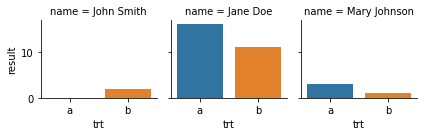

In [0]:
# Look at some of the awesome out-of-the-box seaborn functionality:
import seaborn as sns

sns.catplot(x='trt', y='result', col='name', 
            kind='bar', data=tidy1, height=2);

## Follow Along

Now with Instacart Data. We're going to try and reproduce a small part of this visualization: 

In [0]:
from IPython.display import display, Image
url = 'https://cdn-images-1.medium.com/max/1600/1*wKfV6OV-_1Ipwrl7AjjSuw.png'
example = Image(url=url, width=600)

display(example)

Instead of a plot with 50 products, we'll just do two — the first products from each list
- Half And Half Ultra Pasteurized
- Half Baked Frozen Yogurt

So, given a `product_name` we need to calculate its `order_hour_of_day` pattern.

In [0]:
products = pd.read_csv('products.csv')

order_products = pd.concat([pd.read_csv('order_products__prior.csv'), 
                            pd.read_csv('order_products__train.csv')])

orders = pd.read_csv('orders.csv')

### Subset and Merge

One challenge of performing a merge on this data is that the `products` and `orders` datasets do not have any common columns that we can merge on. Due to this we will have to use the `order_products` dataset to provide the columns that we will use to perform the merge.

Here's the two products that we want to work with.

In [0]:
product_names = ['Half Baked Frozen Yogurt', 'Half And Half Ultra Pasteurized']

Lets remind ourselves of what columns we have to work with:

In [0]:
products.columns.to_list()

['product_id', 'product_name', 'aisle_id', 'department_id']

In [0]:
orders.columns.to_list()

['order_id',
 'user_id',
 'eval_set',
 'order_number',
 'order_dow',
 'order_hour_of_day',
 'days_since_prior_order']

In [0]:
order_products.columns.to_list()

['order_id', 'product_id', 'add_to_cart_order', 'reordered']

This might blow your mind, but we're going to subset the dataframes to select specific columns **and** merge them all in one go. Ready?

In [0]:
merged = (products[['product_id', 'product_name']]
          .merge(order_products[['order_id', 'product_id']])
          .merge(orders[['order_id', 'order_hour_of_day']]))

merged.head()

,product_id,product_name,order_id,order_hour_of_day
0,1,Chocolate Sandwich Cookies,1107,11
1,769,Sliced American Cheese,1107,11
2,6184,Clementines,1107,11
3,8048,Packaged Grape Tomatoes,1107,11
4,9007,Frosted Flakes,1107,11


Ok, so we were a little bit lazy and probably should have subsetted our the rows of our dataframes before we merged them. We are going to filter after the fact. This is something that you can try out for practice. Can you figure out how to filter these dataframes **before** merging rather than after?

In [0]:
condition = ((merged['product_name']=='Half Baked Frozen Yogurt') | 
             (merged['product_name']=='Half And Half Ultra Pasteurized'))

merged = merged[condition]

print(merged.shape)
merged.head()

(5978, 4)


,product_id,product_name,order_id,order_hour_of_day
25086,30668,Half Baked Frozen Yogurt,595220,21
29409,30668,Half Baked Frozen Yogurt,3252348,16
33914,30668,Half Baked Frozen Yogurt,677455,17
34412,30668,Half Baked Frozen Yogurt,1821824,14
35652,30668,Half Baked Frozen Yogurt,1225489,17


Again, there are multiple effective ways to write conditions. 

In [0]:
product_names = ['Half Baked Frozen Yogurt', 'Half And Half Ultra Pasteurized']

condition = merged['product_name'].isin(product_names)

subset = merged[condition]

print(subset.shape)
subset.head()

(5978, 4)


,product_id,product_name,order_id,order_hour_of_day
25086,30668,Half Baked Frozen Yogurt,595220,21
29409,30668,Half Baked Frozen Yogurt,3252348,16
33914,30668,Half Baked Frozen Yogurt,677455,17
34412,30668,Half Baked Frozen Yogurt,1821824,14
35652,30668,Half Baked Frozen Yogurt,1225489,17


### 4 ways to reshape and plot



In [0]:
display(example)

1) The `.value_counts()` approach.

Remember, that we're trying to get the key variables (values) listed as a single column.

In [0]:
froyo = subset[subset['product_name']=='Half Baked Frozen Yogurt']
cream = subset[subset['product_name']=='Half And Half Ultra Pasteurized']

In [0]:
cream['order_hour_of_day'].value_counts(normalize=True).sort_index()

0     0.002003
1     0.000334
2     0.000334
4     0.000334
5     0.001336
6     0.008347
7     0.031720
8     0.107846
9     0.160267
10    0.143239
11    0.097496
12    0.066778
13    0.071119
14    0.071786
15    0.074124
16    0.072788
17    0.037062
18    0.018698
19    0.009349
20    0.010684
21    0.007679
22    0.004007
23    0.002671
Name: order_hour_of_day, dtype: float64

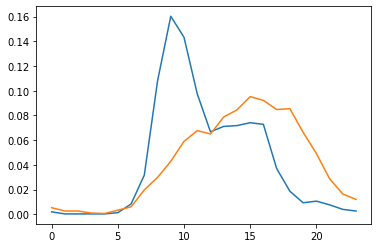

In [0]:
(cream['order_hour_of_day']
 .value_counts(normalize=True)
 .sort_index()
 .plot())

(froyo['order_hour_of_day']
 .value_counts(normalize=True)
 .sort_index()
 .plot());

2) Crosstab

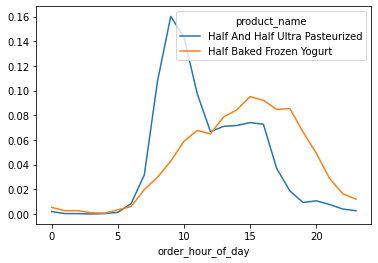

In [0]:
pd.crosstab(subset['order_hour_of_day'], 
            subset['product_name'], 
            normalize='columns').plot();

3) Pivot Table

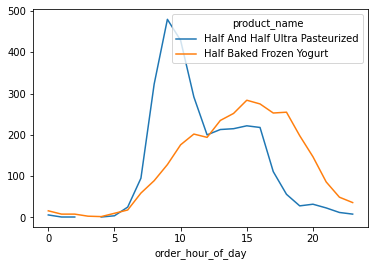

In [0]:
subset.pivot_table(index='order_hour_of_day', columns='product_name', values='order_id', aggfunc=len).plot();

4) Melt 

We've got to get it into wide format first. We'll use a crosstab which is a specific type of pivot_table.

In [0]:
wide = pd.crosstab(subset['order_hour_of_day'], 
                    subset['product_name'], 
                    normalize=True)

wide

product_name,Half And Half Ultra Pasteurized,Half Baked Frozen Yogurt
order_hour_of_day,,
0,0.001004,0.002676
1,0.000167,0.001338
2,0.000167,0.001338
3,0.000000,0.000502
4,0.000167,0.000335
5,0.000669,0.001673
6,0.004182,0.003011
7,0.015892,0.009870
8,0.054031,0.014888


In [0]:
melted = wide.reset_index().melt(id_vars='order_hour_of_day')

# rename column headers

melted = melted.rename(columns={
     'order_hour_of_day': 'Hour of Day Ordered', 
     'product_name': 'Product', 
     'value': 'Percent of Orders by Product'
 })

melted

,Hour of Day Ordered,Product,Percent of Orders by Product
0,0,Half And Half Ultra Pasteurized,0.001004
1,1,Half And Half Ultra Pasteurized,0.000167
2,2,Half And Half Ultra Pasteurized,0.000167
3,3,Half And Half Ultra Pasteurized,0.000000
4,4,Half And Half Ultra Pasteurized,0.000167
5,5,Half And Half Ultra Pasteurized,0.000669
6,6,Half And Half Ultra Pasteurized,0.004182
7,7,Half And Half Ultra Pasteurized,0.015892
8,8,Half And Half Ultra Pasteurized,0.054031
9,9,Half And Half Ultra Pasteurized,0.080294


Now, with Seaborn:

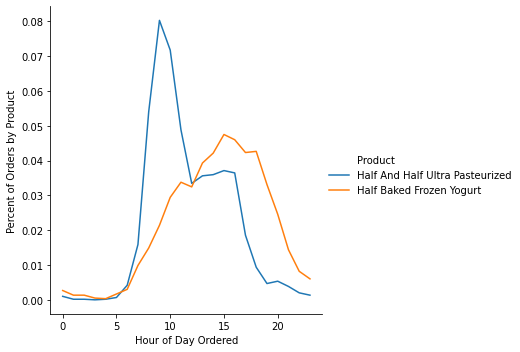

In [0]:
sns.relplot(x='Hour of Day Ordered', y='Percent of Orders by Product', hue='Product', data=melted, kind='line');